# Network Intrusion Detection 

The goal of this project is to be able to mimic the behaviour of an IDS in order to be able to detect anomaly access. Throughout this project, many algorithms have been selected to better fit the criteria that this ML IDS is trying to achieve.

## Libraries Used

I order to speed up the process and keeping a simpler code, I decided to use pr-existing libraries such as train_test_split instead of manually assign them, optuna to limit test each algorithm for the best test accuracy and pickle to save each model.

The required libraries are:
- optuna
- pandas 
- numpy 
- seaborn
- pickle
- matplotlib.pyplot
- catboost 
  - CatBoostClassifier
- xgboost 
  - XGBClassifier
- sklearn.tree 
  - DecisionTreeClassifier
- sklearn.ensemble :  
  - RandomForestClassifier 
  - GradientBoostingClassifier 
  - VotingClassifier 
  - AdaBoostClassifier 
  - GradientBoostingClassifier
- sklearn.metrics 
  - confusion_matrix
  - ConfusionMatrixDisplay
  - accuracy_score
- sklearn.feature_selection 
  - SelectKBest
  - chi2
- sklearn.model_selection 
  - train_test_split
- sklearn.pipeline 
  - Pipeline
- sklearn.preprocessing 
  - StandardScaler

---



## Google Colab Preperation
 Since this project is hosted on Google Colab, the required libraries that are not pre-installed need to be installed manually

In [1]:
!pip install snapml
!pip install catboost
!pip install optuna scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 11.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 7.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 KB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 7.9 MB/s eta 0:00:00


## Importing Required Libraries

Warnings filter and absl.logging are not required and will not affect our ML methods however, for the sake of cleaner code they will be imported



In [25]:
import warnings
warnings.filterwarnings("ignore")
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)



import optuna
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

'''
Loading Test_data and Train_data from my github repository
It's worth noting that this dataset has not been generated by me and all rights 
are reserved by the original author
The data was found on : https://www.kaggle.com/datasets/sampadab17/network-intrusion-detection
'''


test_url = "https://raw.githubusercontent.com/kasra-sal/Network_Intrusion_Detection/main/Test_data.csv"
train_url = "https://raw.githubusercontent.com/kasra-sal/Network_Intrusion_Detection/main/Train_data.csv"
test_data = pd.read_csv(test_url, on_bad_lines='skip')
train_data = pd.read_csv(train_url, on_bad_lines='skip')


## Gaining insight on the database and preparing the data for training

In [3]:
print(train_data.isna().sum())
print(test_data.isna().sum())

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [4]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [5]:
train_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
test_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,193.869411,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,94.035663,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Plots

This is just to get an idea of how many rows are in each category of our target and if necessary, downsample or resample the data to better match weights

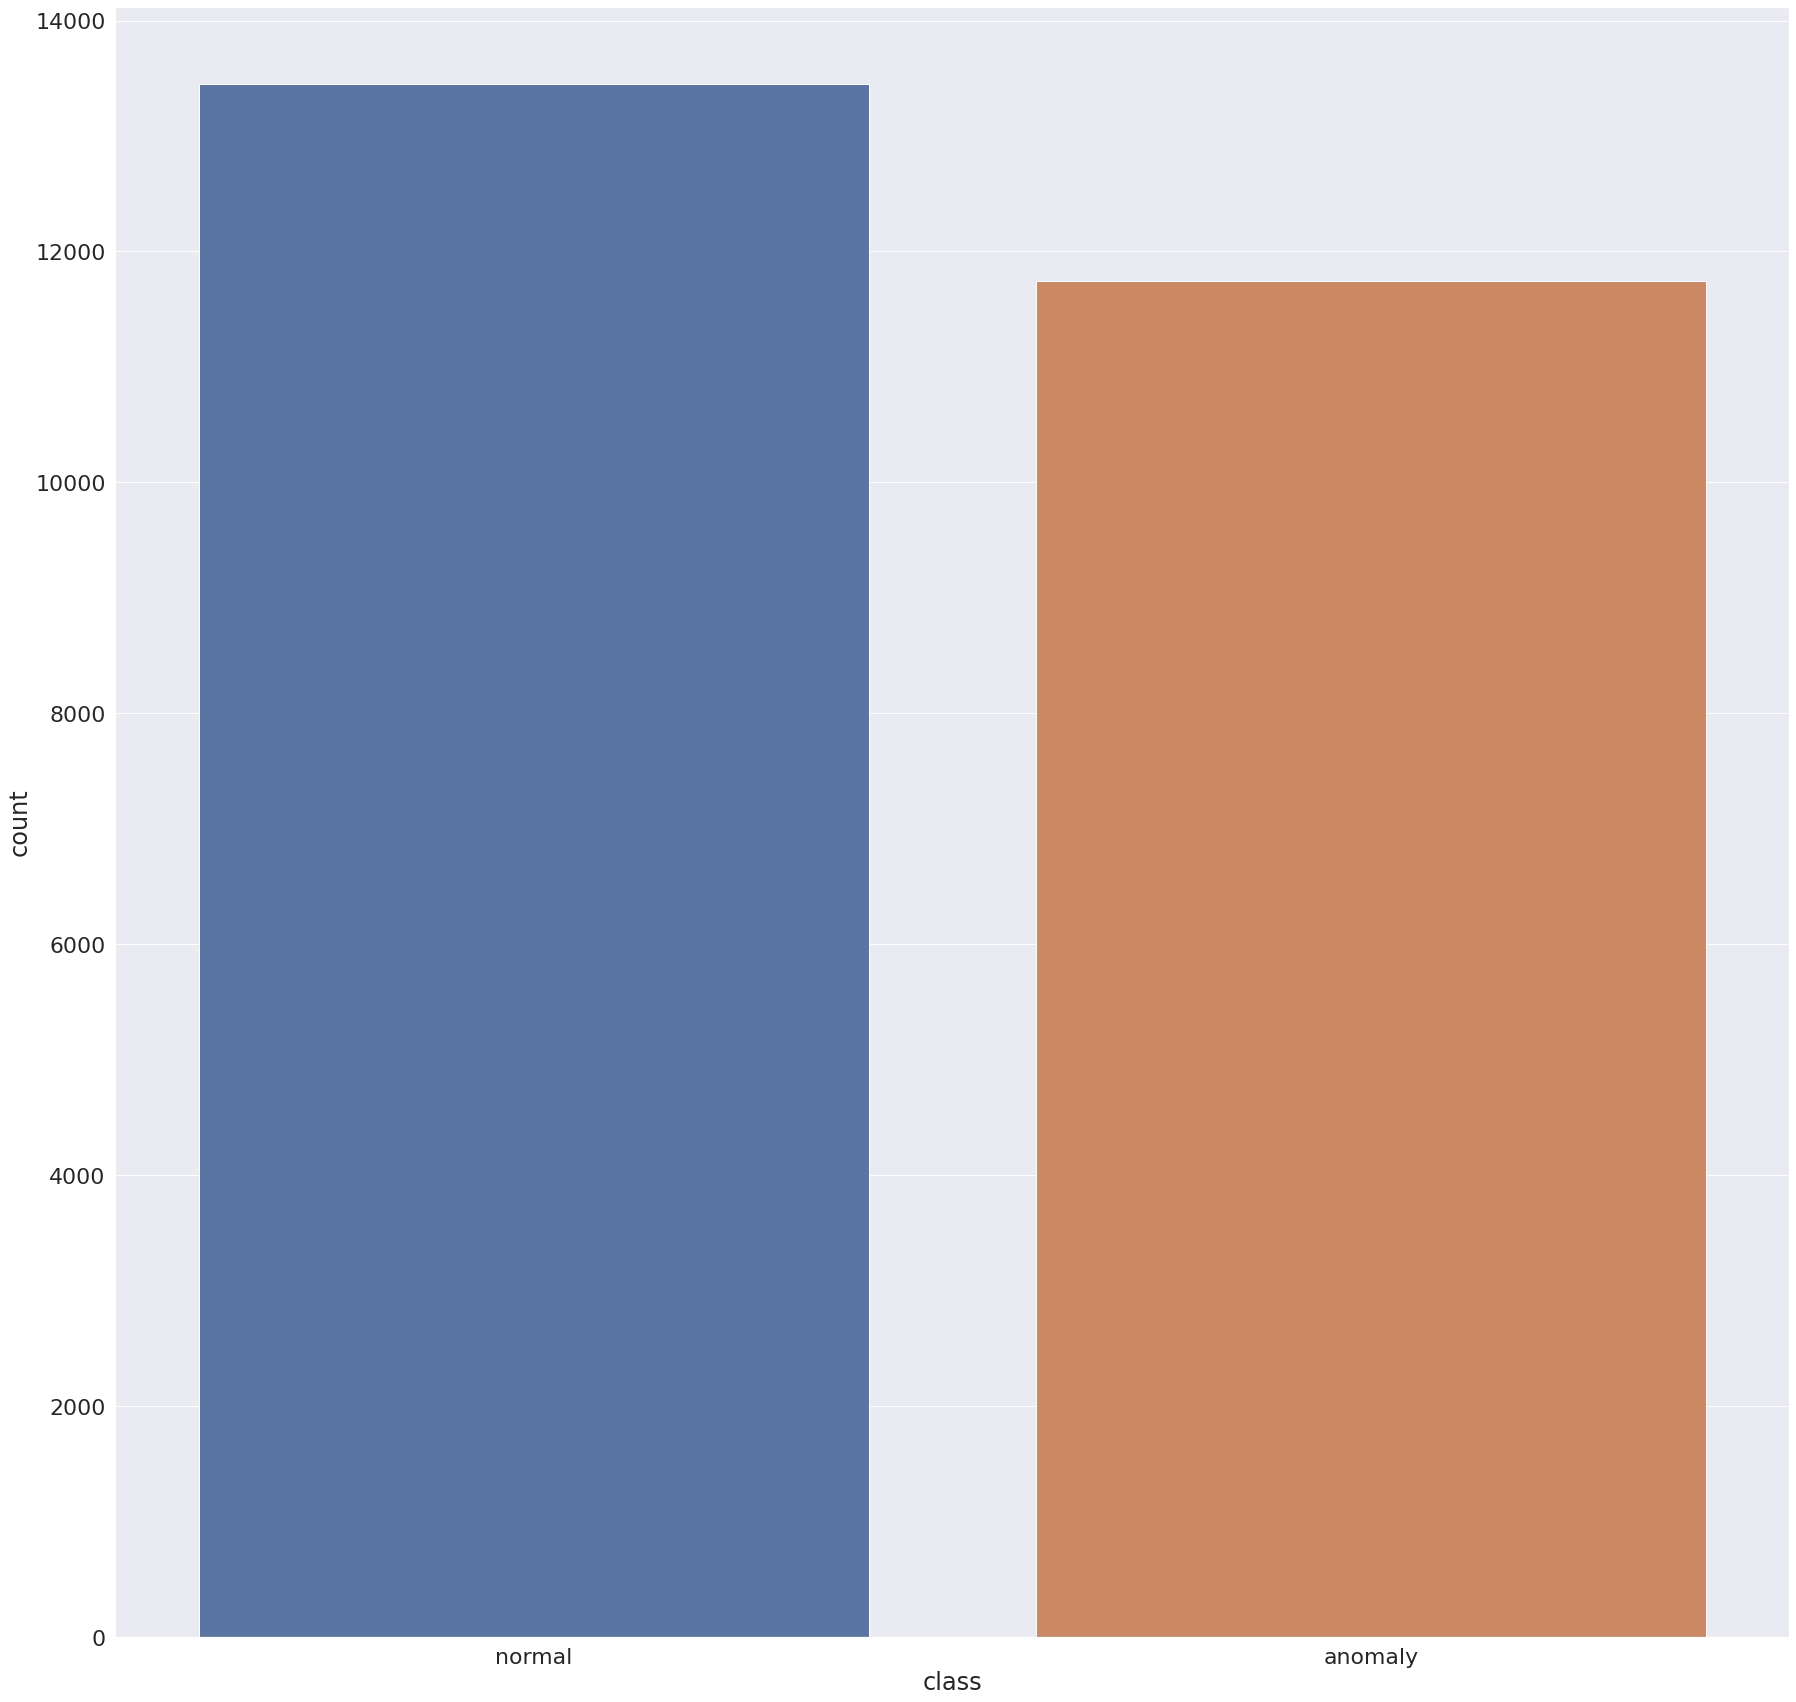

In [26]:
sns.set(rc={'figure.figsize':(30,30)},font_scale=2)

sns.countplot(train_data['class'])

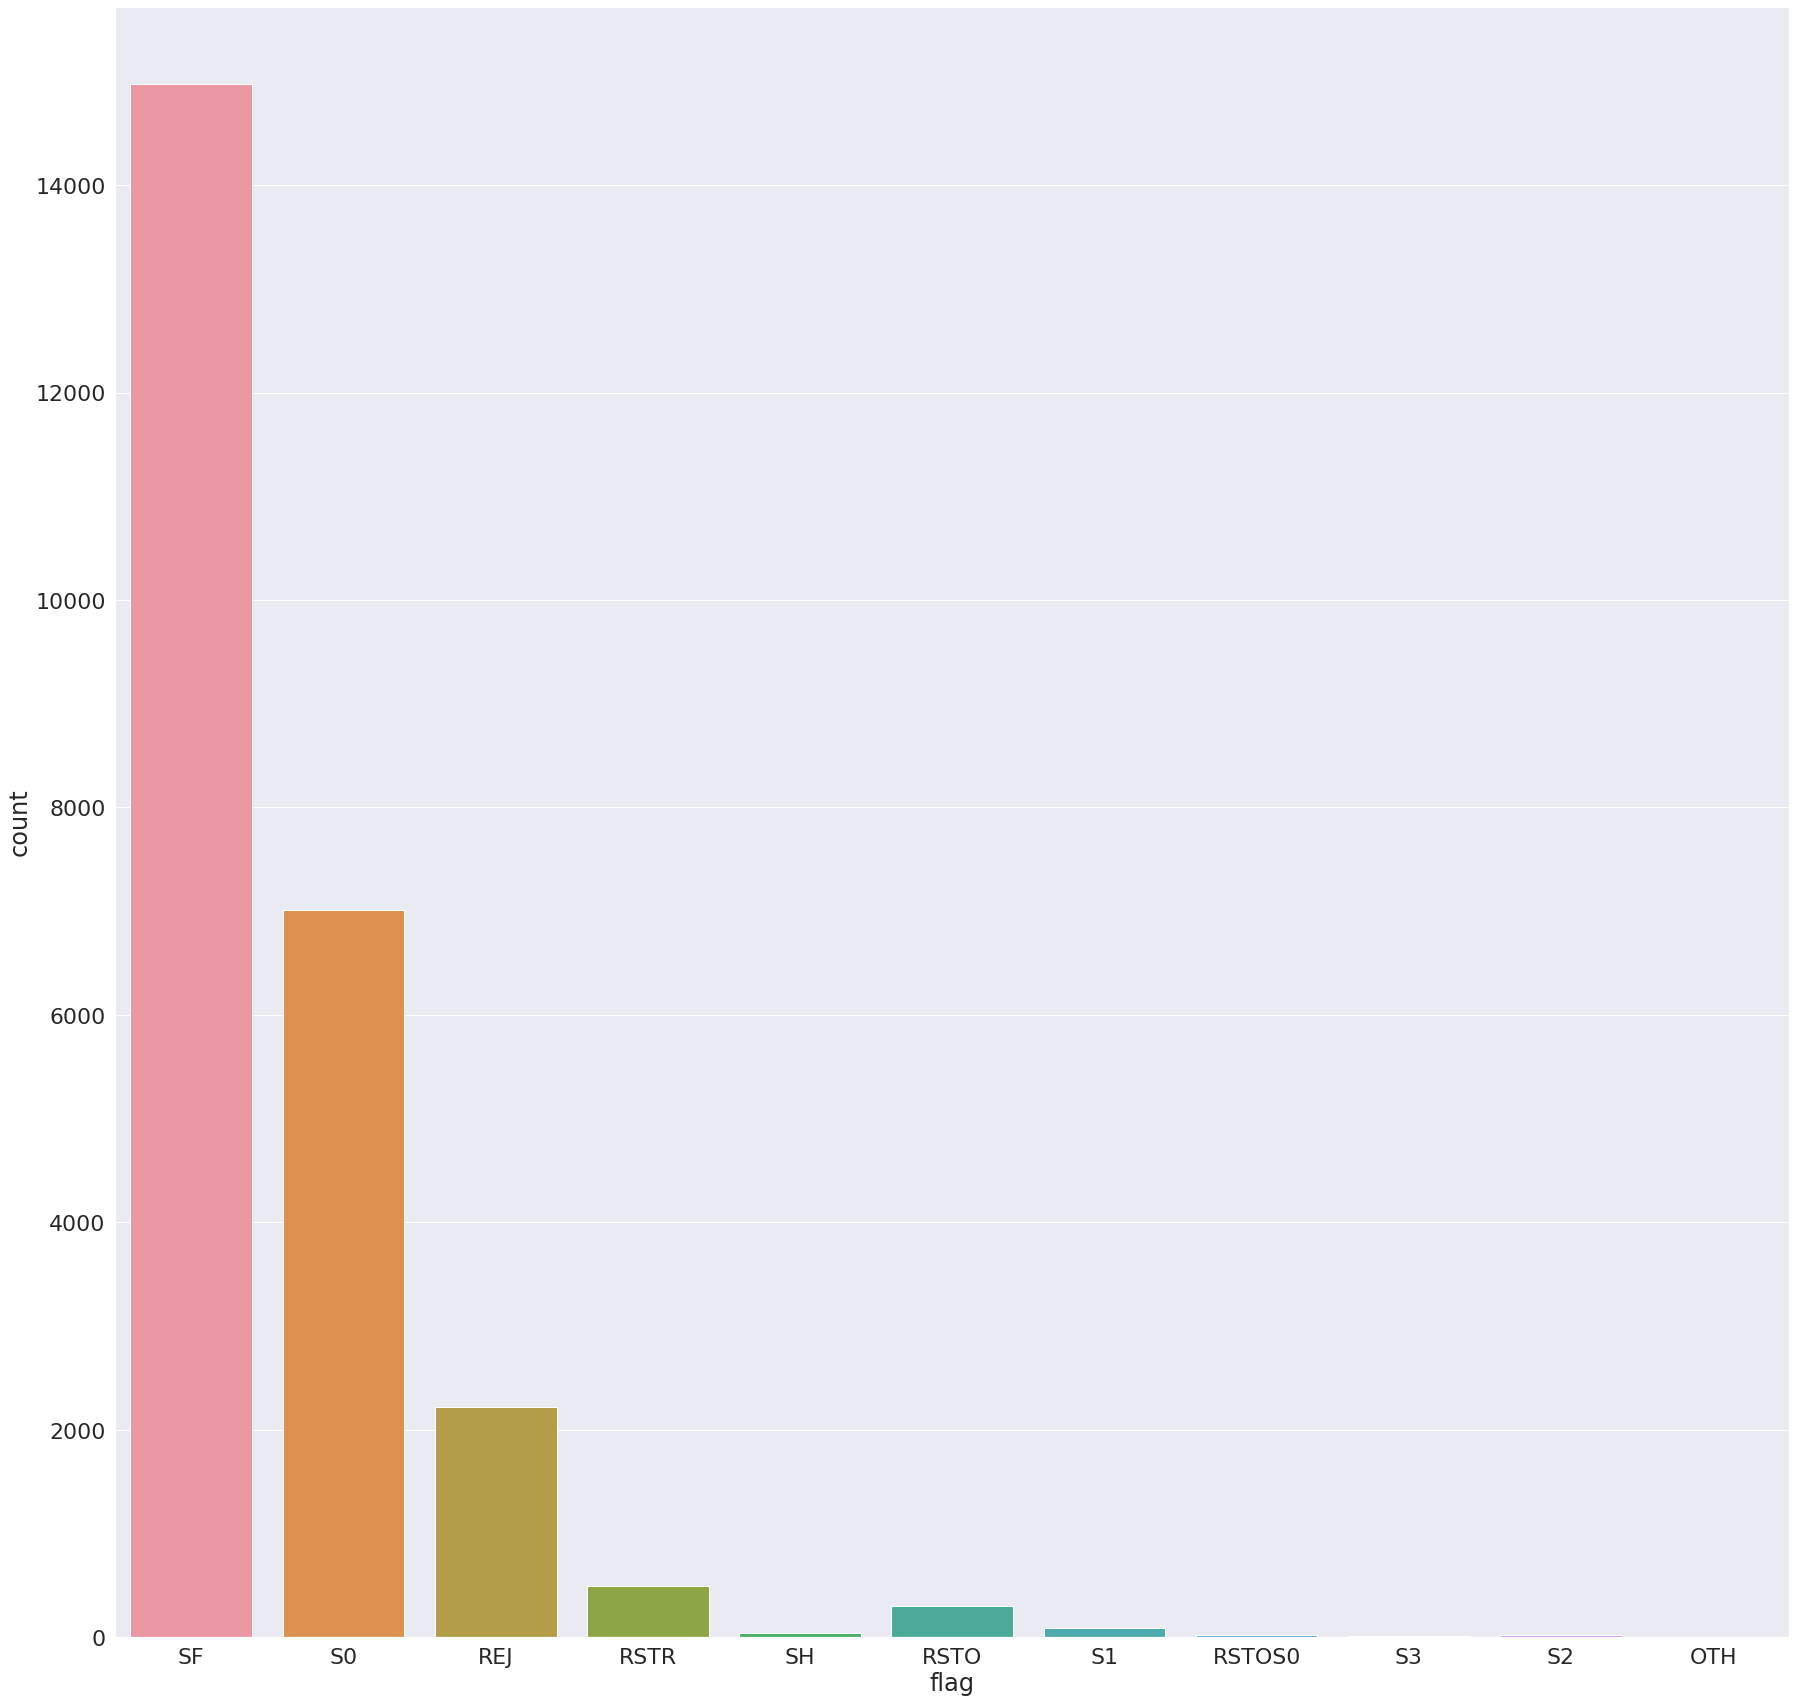

In [27]:
sns.countplot(train_data['flag'])

In [9]:
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [10]:
test_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


# Train_data and Test_data preperation 



In [11]:
''' 
Based on train_data.info(), we can see multiple columns are "objects" and from 
further inspection, they are strings. Here those objects will be mapped to
integers ranging from 0 to n where n is the number of unique entries
'''

print(train_data['class'].unique(),'\n',train_data['protocol_type'].unique(),'\n',
      train_data['service'].unique(),'\n', train_data['flag'].unique(),'\n')

# function to create a dictionary for unique values and their respective encoding

def dictionary_mapper(x):
  dictionary = {v:k for k,v in enumerate(train_data[x].unique())}
  return dictionary

class_ = dictionary_mapper('class')
service = dictionary_mapper('service')
protocol_type = dictionary_mapper('protocol_type')
flag = dictionary_mapper('flag')

print(class_,service,protocol_type,flag)

map_dictionary = {**class_,**service,**protocol_type,**flag}

print(map_dictionary)

train_data = train_data.replace(map_dictionary)



['normal' 'anomaly'] 
 ['tcp' 'udp' 'icmp'] 
 ['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001'] 
 ['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH'] 

{'normal': 0, 'anomaly': 1} {'ftp_data': 0, 'other': 1, 'private': 2, 'http': 3, 'remote_job': 4, 'name': 5, 'netbios_ns': 6, 'eco_i': 7, 'mtp': 8, 'telnet': 9, 'finger': 10, 'domain_u': 11, 'supdup': 12, 'uucp_path': 13, 'Z39_50': 14, 'smtp': 15, 'csnet_ns': 16, 'uucp': 17, 'netbios_dgm': 18, 'urp_

In [12]:
'''
Same process as train_data however on the train_data.info(), the 'class' section
is missing therefore it will not be included in the mapping
'''

print('\n',test_data['protocol_type'].unique(),'\n',
      test_data['service'].unique(),'\n', test_data['flag'].unique(),'\n')

def dictionary_mapper(x):
  dictionary = {v:k for k,v in enumerate(test_data[x].unique())}
  return dictionary

service = dictionary_mapper('service')
protocol_type = dictionary_mapper('protocol_type')
flag = dictionary_mapper('flag')

print(service,protocol_type,flag)

map_dictionary = {**service,**protocol_type,**flag}

print(map_dictionary)

test_data = test_data.replace(map_dictionary)


 ['tcp' 'icmp' 'udp'] 
 ['private' 'ftp_data' 'eco_i' 'telnet' 'http' 'smtp' 'ftp' 'ldap' 'pop_3'
 'courier' 'discard' 'ecr_i' 'imap4' 'domain_u' 'mtp' 'systat' 'iso_tsap'
 'other' 'csnet_ns' 'finger' 'uucp' 'whois' 'netbios_ns' 'link' 'Z39_50'
 'sunrpc' 'auth' 'netbios_dgm' 'uucp_path' 'vmnet' 'domain' 'name' 'pop_2'
 'http_443' 'urp_i' 'login' 'gopher' 'exec' 'time' 'remote_job' 'ssh'
 'kshell' 'sql_net' 'shell' 'hostnames' 'echo' 'daytime' 'pm_dump' 'IRC'
 'netstat' 'ctf' 'nntp' 'netbios_ssn' 'tim_i' 'supdup' 'bgp' 'nnsp' 'rje'
 'printer' 'efs' 'X11' 'ntp_u' 'klogin' 'tftp_u'] 
 ['REJ' 'SF' 'RSTO' 'S0' 'RSTR' 'SH' 'S3' 'S2' 'S1' 'RSTOS0' 'OTH'] 

{'private': 0, 'ftp_data': 1, 'eco_i': 2, 'telnet': 3, 'http': 4, 'smtp': 5, 'ftp': 6, 'ldap': 7, 'pop_3': 8, 'courier': 9, 'discard': 10, 'ecr_i': 11, 'imap4': 12, 'domain_u': 13, 'mtp': 14, 'systat': 15, 'iso_tsap': 16, 'other': 17, 'csnet_ns': 18, 'finger': 19, 'uucp': 20, 'whois': 21, 'netbios_ns': 22, 'link': 23, 'Z39_50': 24, 'sunrpc

In [13]:
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,0,0,0,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,1,1,0,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,0,2,1,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,0,3,0,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,0,3,0,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [14]:
test_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,0,0,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,0,0,0,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,0,1,1,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,1,2,1,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,0,3,2,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


In [15]:
'''
Here our target will be set on 'class' column so it will be dropped from our
X axis and it is set to our y values. Then it is split into 80% Train and 20% Test
'''
X = train_data.drop('class',axis=1)
y = train_data['class']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)



(20153, 41) (20153,) (5039, 41) (5039,)


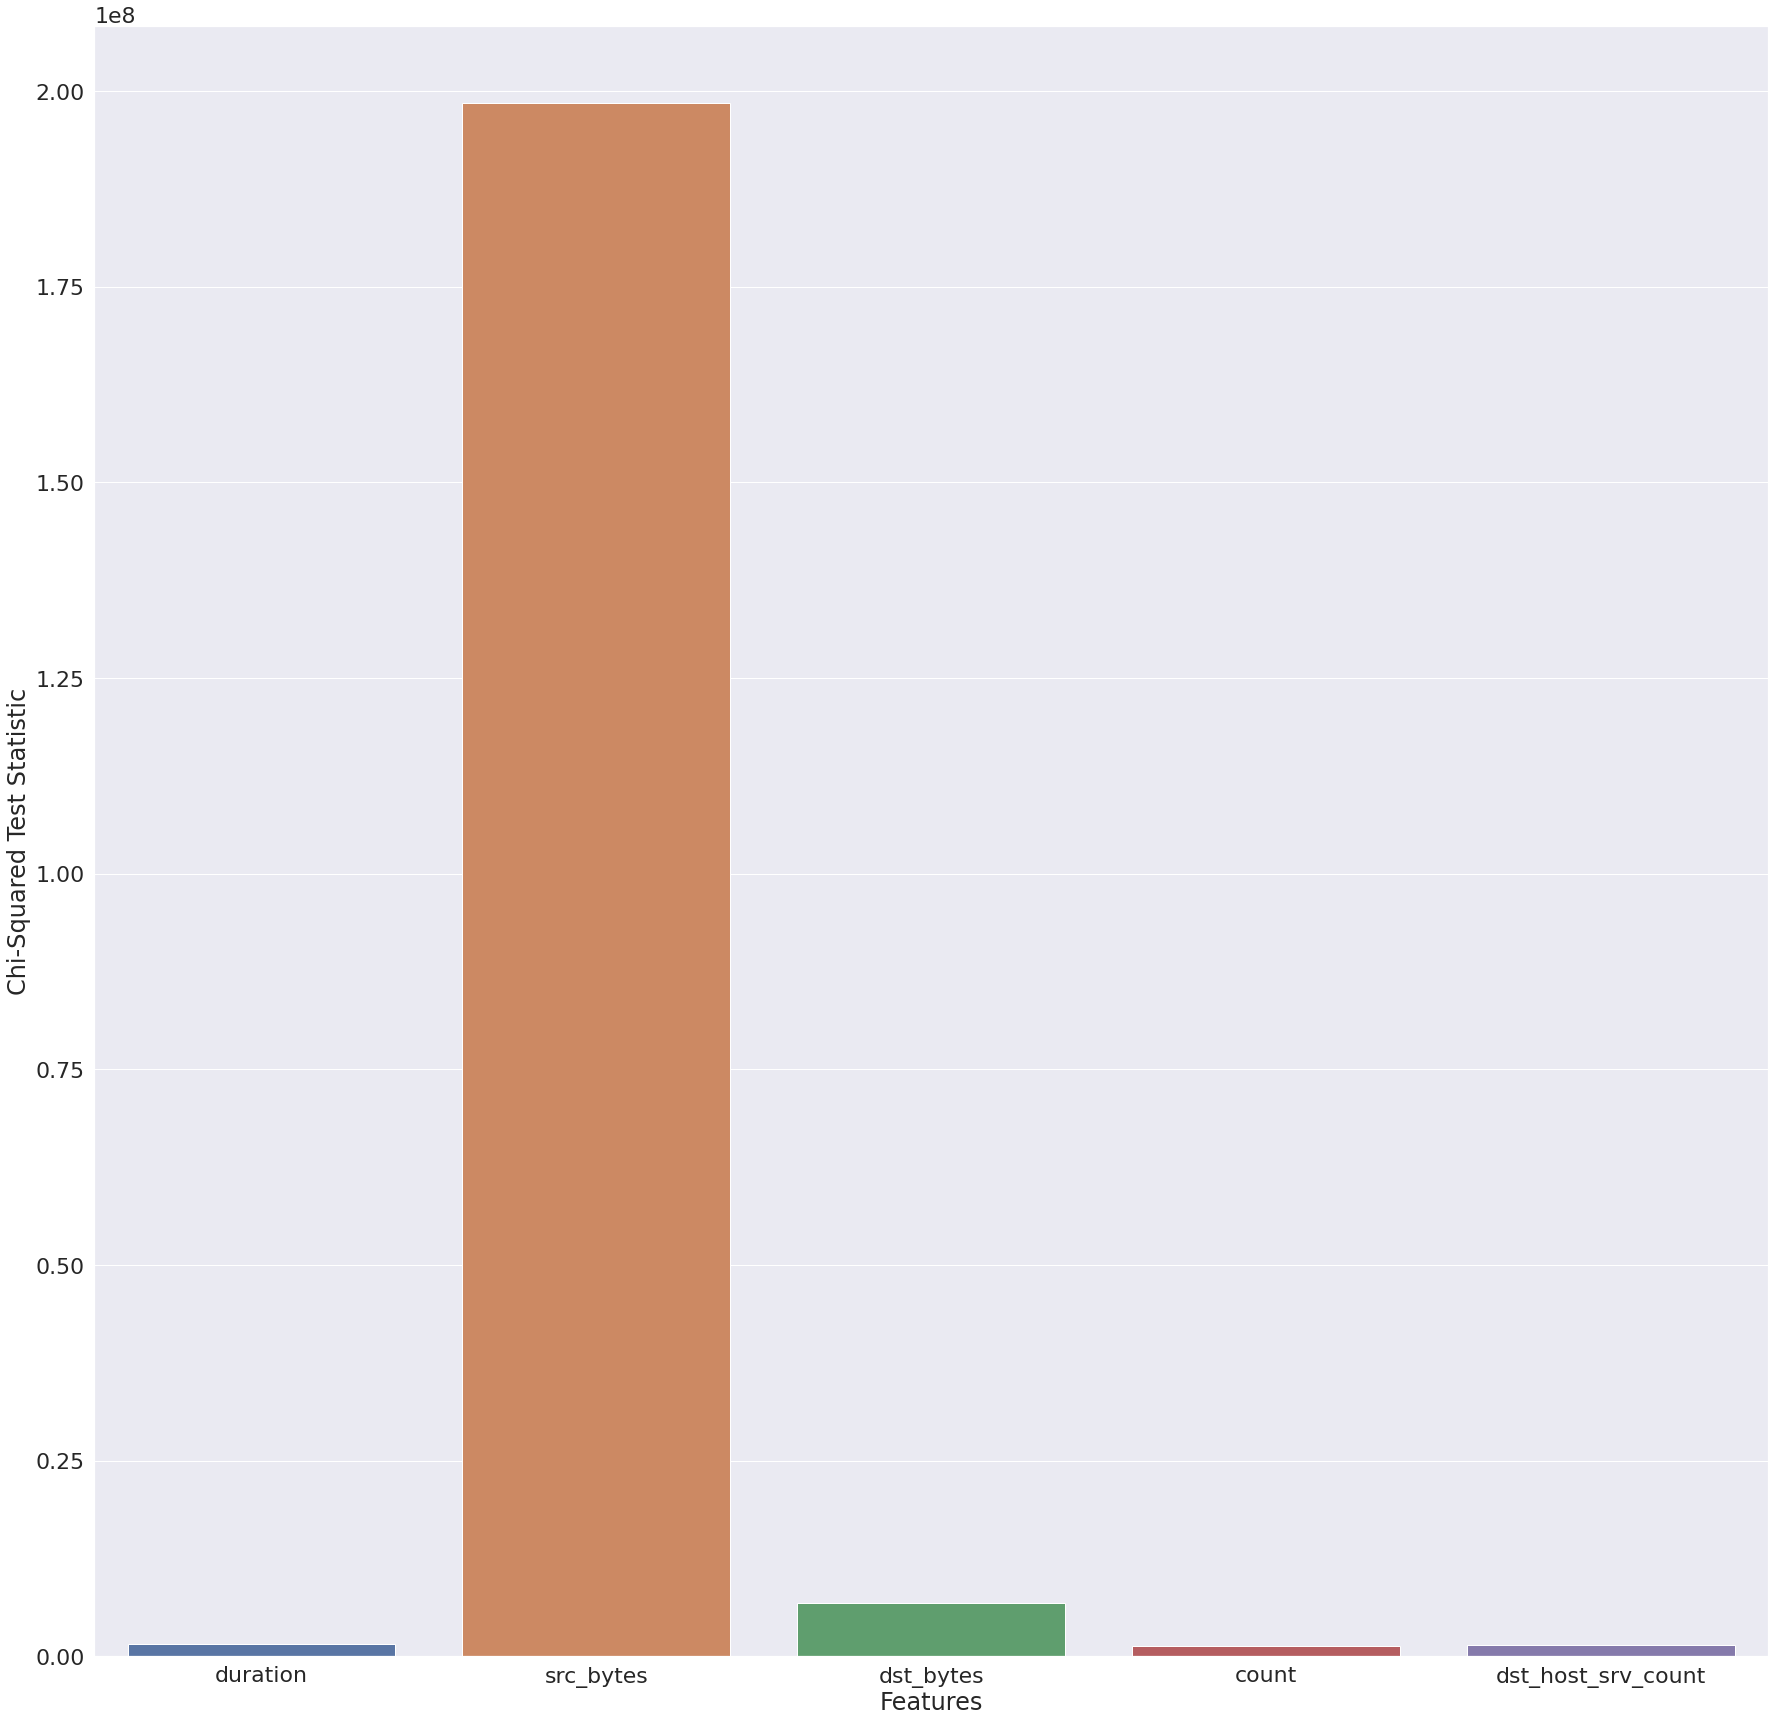

In [28]:
'''
This is just a reference for feature_selection. I didn't include it in my data
training however using chi square and KBest five of the most important features
have been illustrated.
'''

selector = SelectKBest(chi2, k=5)
X_new = selector.fit_transform(X, y)

# get columns of selected features
mask = selector.get_support()
selected_columns = X.columns[mask]

# visualize results
sns.barplot(x=selected_columns, y=selector.scores_[mask])
plt.xlabel("Features")
plt.ylabel("Chi-Squared Test Statistic")
plt.show()

In [17]:
'''
Scaling data as necessary
'''
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [18]:
'''
Creating a class for optimization where it will try to optimize the following 
models to the highest test accuracy. During testing, optimizing Catboost, Adaboost
and XGB became counter productive and resulted in lower accuracy so it is left out
'''
class optimizer:
  def __init__(self,X_train,y_train,X_test,y_test):
    self.X_train = X_train
    self.y_train = y_train
    self.X_test = X_test
    self.y_test = y_test


  def DCT_Classifier(self,min_depth,max_depth,depth_interval,trials):
    def objective(trial):
        DCT = DecisionTreeClassifier(
            criterion=trial.suggest_categorical("criterion", ["gini", "entropy"]),
            max_depth=trial.suggest_int("max_depth",min_depth, max_depth, step=depth_interval),
            max_features = trial.suggest_int("max_features",2,20),
            min_samples_leaf=trial.suggest_int("min_samples_leaf", 2, 32, step=2),
            min_samples_split=trial.suggest_int("min_samples_split", 2, 20, step=1),
        )
        DCT.fit(self.X_train, self.y_train)
        y_pred = DCT.predict(self.X_test)
        test_accuracy = accuracy_score(self.y_test, y_pred)
        
        return test_accuracy
    
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=trials)
    best_trial = study.best_trial
    best_DCT = DecisionTreeClassifier(**best_trial.params)
    model = best_DCT.fit(self.X_train, self.y_train)
    train_score, test_score = model.score(self.X_train,self.y_train),model.score(self.X_test,self.y_test)

    return best_DCT,train_score,test_score

  def RFT_Classifier(self,min_depth,max_depth,depth_interval,min_n_estimators,high_n_estimators,trials):
    def objective(trial):
        rf = RandomForestClassifier(
            n_estimators=trial.suggest_int("n_estimators", min_n_estimators, high_n_estimators),
            max_depth=trial.suggest_int("max_depth", min_depth, max_depth, step=depth_interval),
            max_features = trial.suggest_int("max_features",2,20),

            min_samples_leaf=trial.suggest_int("min_samples_leaf", 2, 32, step=2),
            min_samples_split=trial.suggest_int("min_samples_split", 2, 20, step=1),
            n_jobs=trial.suggest_int("n_jobs",-1,-1)
        )
        rf.fit(self.X_train, self.y_train)
        y_pred = rf.predict(self.X_test)
        test_accuracy = accuracy_score(self.y_test, y_pred)
        return test_accuracy
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=trials)
    
    best_trial = study.best_trial
    best_RFT = RandomForestClassifier(**best_trial.params)
    model = best_RFT.fit(self.X_train, self.y_train)
    train_score, test_score = model.score(self.X_train,self.y_train),model.score(self.X_test,self.y_test)
    
    return best_RFT,train_score,test_score


In [ ]:
optimizer_ = optimizer(X_train,y_train,X_test,y_test)
DCT  = optimizer_.DCT_Classifier(1,200,1,500)
optimizer_ = optimizer(X_train,y_train,X_test,y_test)
RFT = optimizer_.RFT_Classifier(1,200,1,5,40,500)


In [ ]:
print(DCT)
print(RFT)

## Training models

Last but not least, model training is one of the last steps. Here I created a simple Class for pipe models in order to have everything under the same class. This helped with ease of access for coding.

In [21]:
class pipe_model():
  def __init__(self,X_train,y_train,X_test,y_test):
    self.X_train = X_train
    self.y_train = y_train
    self.X_test = X_test  
    self.y_test = y_test

  def fit(self,pipe_filename):
    model = pipe_filename.fit(self.X_train,self.y_train)
    return model
  def model_score(self,model):
    train_score = model.score(self.X_train, self.y_train)
    test_score = model.score(self.X_test,self.y_test)
    return f'train score : {train_score*100} \ntest score : {test_score*100}'

  def predict(self,model,X_test):
    return model.predict(X_test)

  def save(self,model,filename):
    pickle.dump(model, open( f'{filename}.sav', 'wb'))

  def load(self,filename):
    model = pickle.load(open(f'{filename}.sav', 'rb'))
    return model

RFT = RandomForestClassifier(max_depth=161, max_features=2, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=35, n_jobs=-1)
DCT = DecisionTreeClassifier(criterion='entropy', max_depth=129, max_features=9,
                       min_samples_leaf=18, min_samples_split=16)
XGB = XGBClassifier(objective='binary:logistic',random_state=42)
ABC = AdaBoostClassifier()
CBC = CatBoostClassifier(iterations = 400,verbose=0)

clf_name = ['RandomForestClassifier','DecisionTreeClassifier','XGBClassifier','CatBoostClassifier','AdaBoostClassifier','VotingClassifier']
clf__ = []

clf__.append(RFT)
clf__.append(DCT)
clf__.append(XGB)
clf__.append(CBC)
clf__.append(ABC)
clf__.append(VotingClassifier(estimators=[            
                                     ("XGBClassifier", XGB),
                                     ("RandomForestClassifier", RFT), 
                                     ("DecisionTree", DCT),
                                     ("AdaBoostClassifier", ABC),
                                     ]
                          ,voting = "hard"))

pipeline = Pipeline([
    ('clf', RandomForestClassifier())])


for i in range(len(clf_name)):
  pipeModel = pipe_model(X_train,y_train,X_test,y_test)
  pipeline.set_params(clf = clf__[i])
  model = pipeModel.fit(clf__[i])
  print(f'\n{clf_name[i]}\n')
  accuracy  = pipeModel.model_score(model)
  print(accuracy)
  pipeModel.save(model,clf_name[i])
  


RandomForestClassifier

train score : 99.73204981888553 
test score : 98.69021631276047

DecisionTreeClassifier

train score : 98.98774376023421 
test score : 96.50724350069459

XGBClassifier

train score : 99.57822656676424 
test score : 94.36396110339354

CatBoostClassifier

train score : 99.92556939413487 
test score : 95.23715022821987

AdaBoostClassifier

train score : 98.91827519476008 
test score : 96.36832704901767

VotingClassifier

train score : 99.56830248598224 
test score : 97.95594363961104


## Confusion Matrix

This section is just to be able to visualize the performance of the model better. Not necessary for training or predicting values


 RandomForestClassifier 



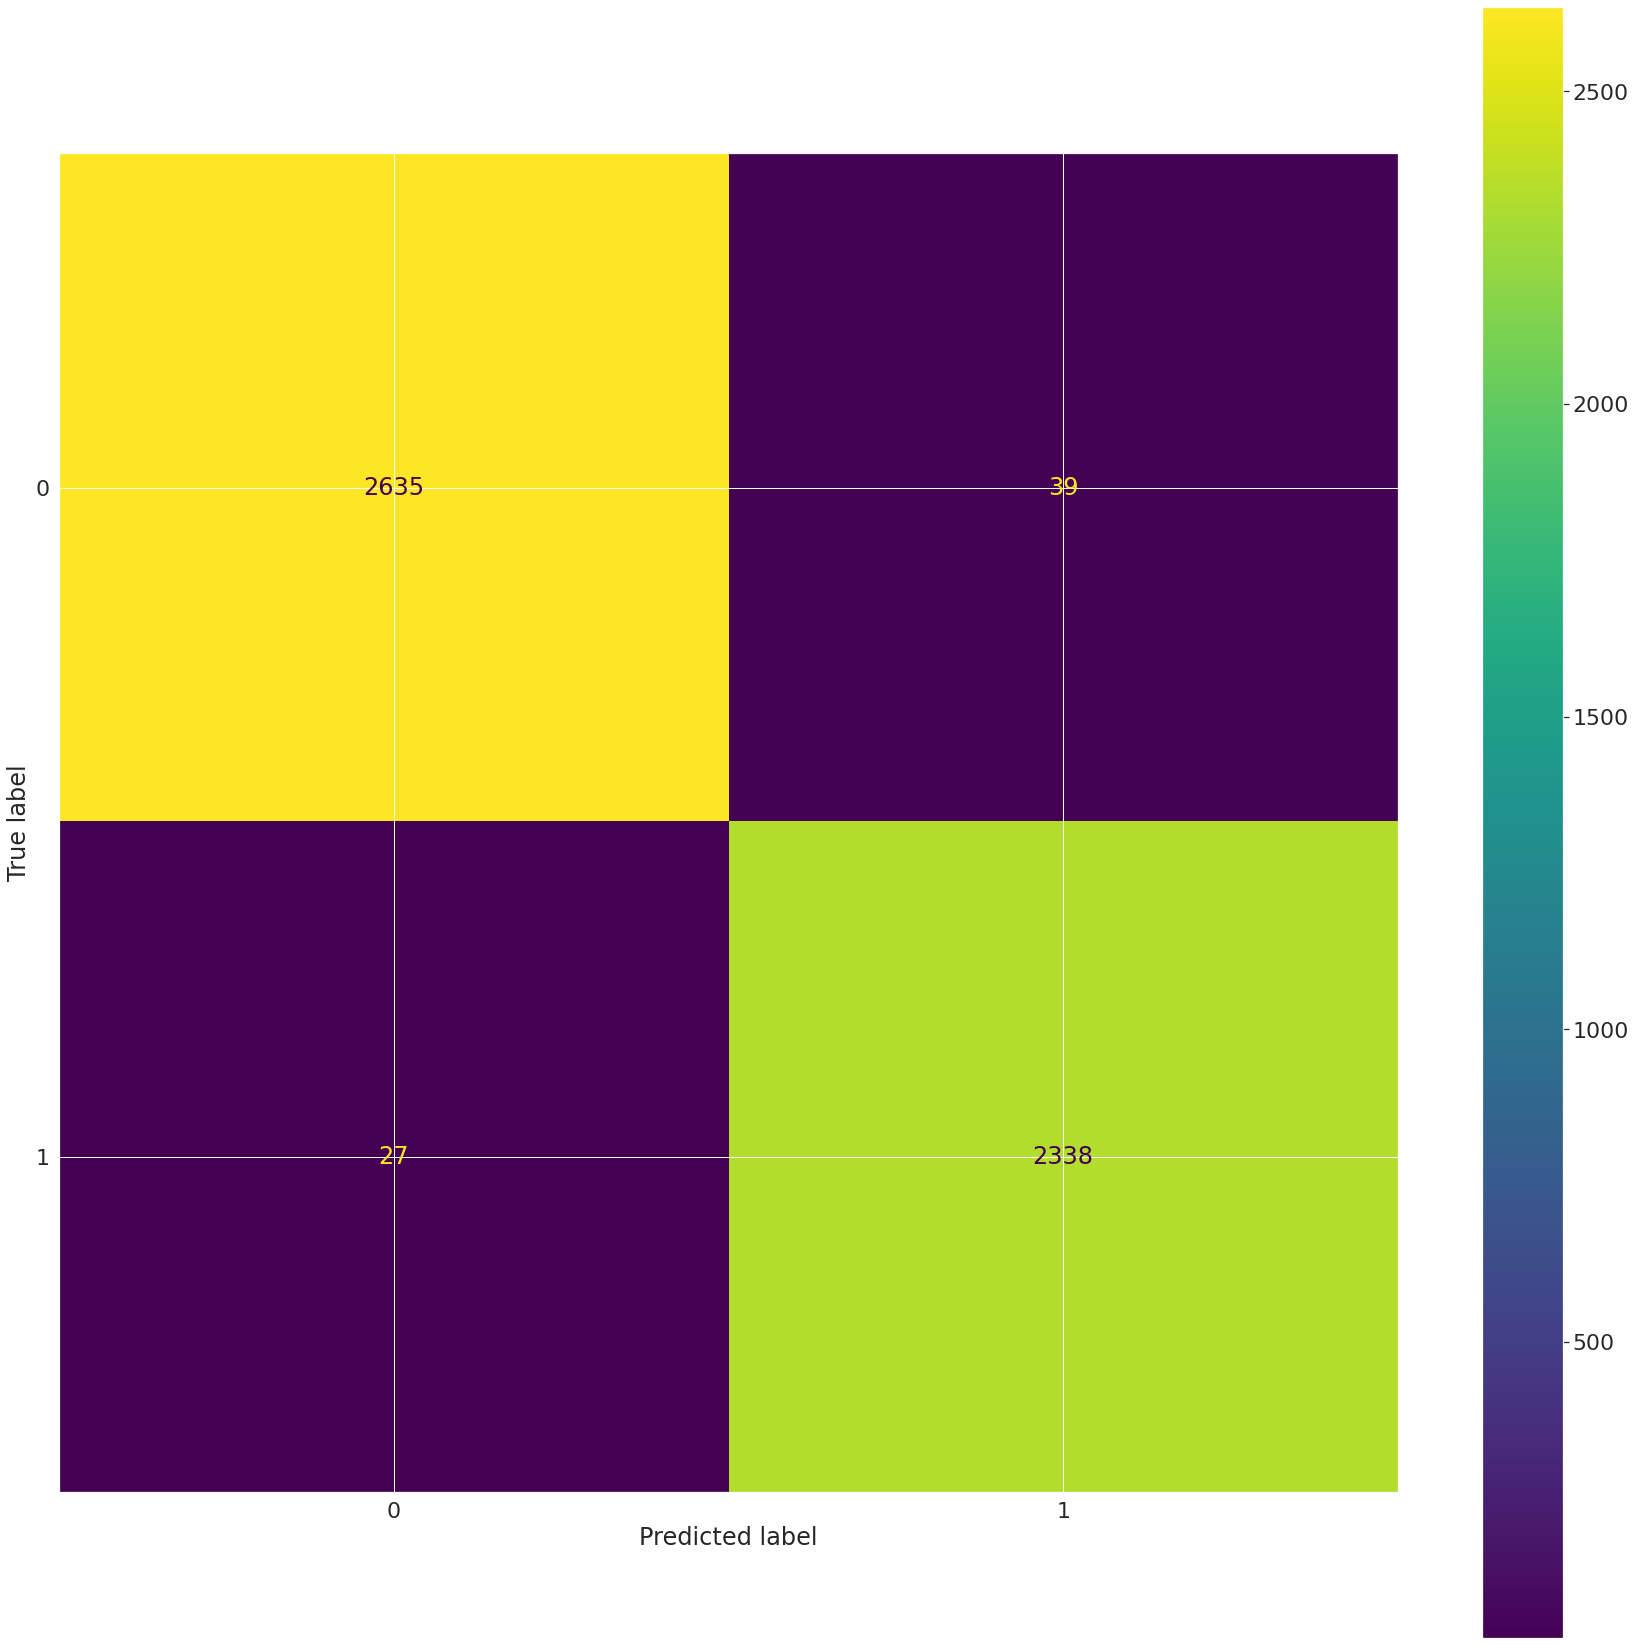


 DecisionTreeClassifier 



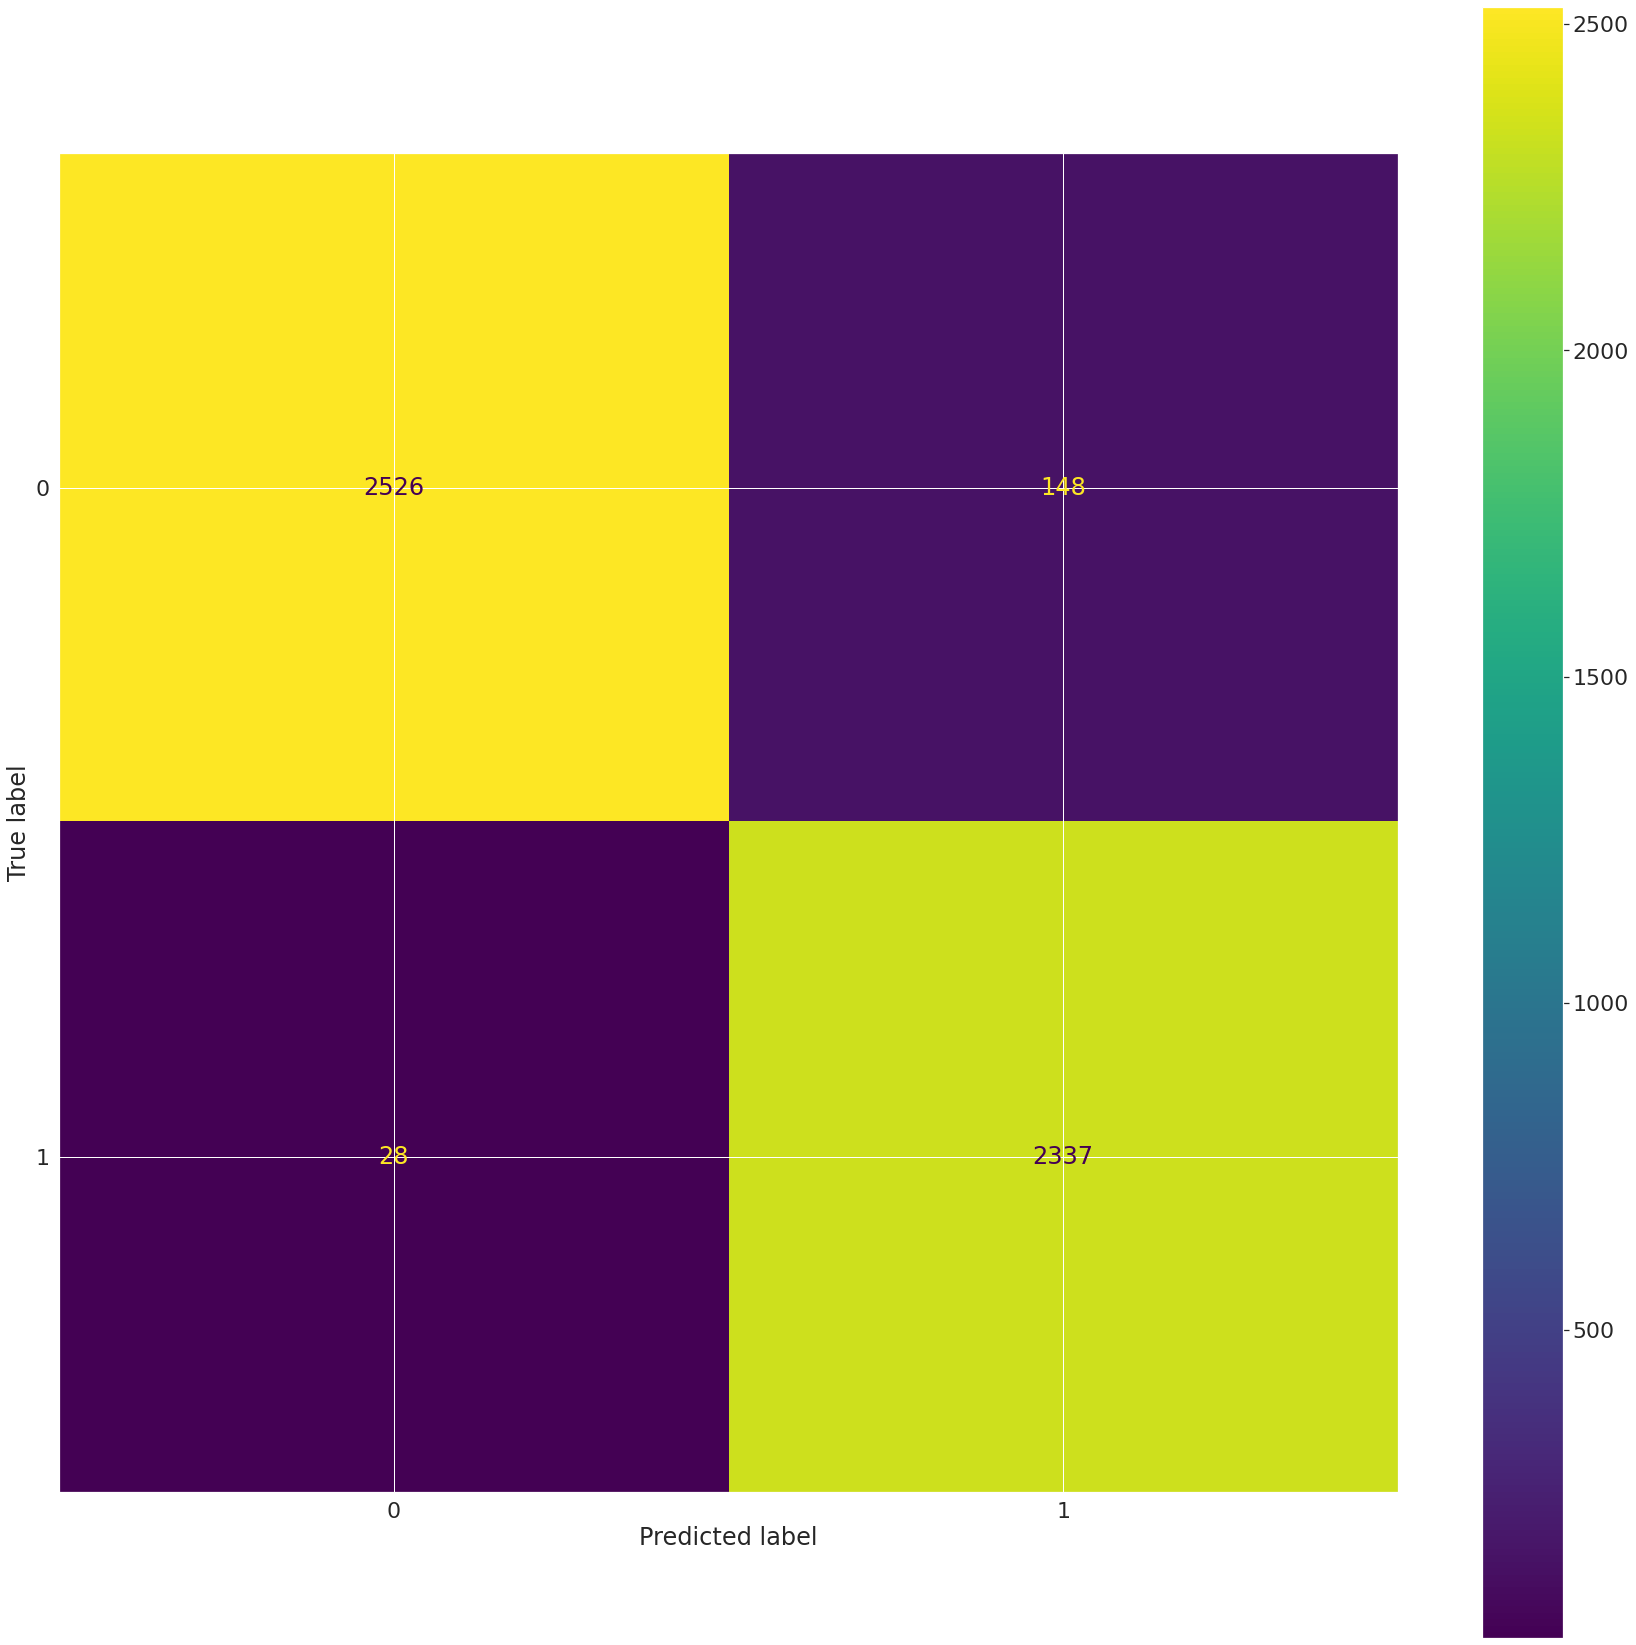


 XGBClassifier 



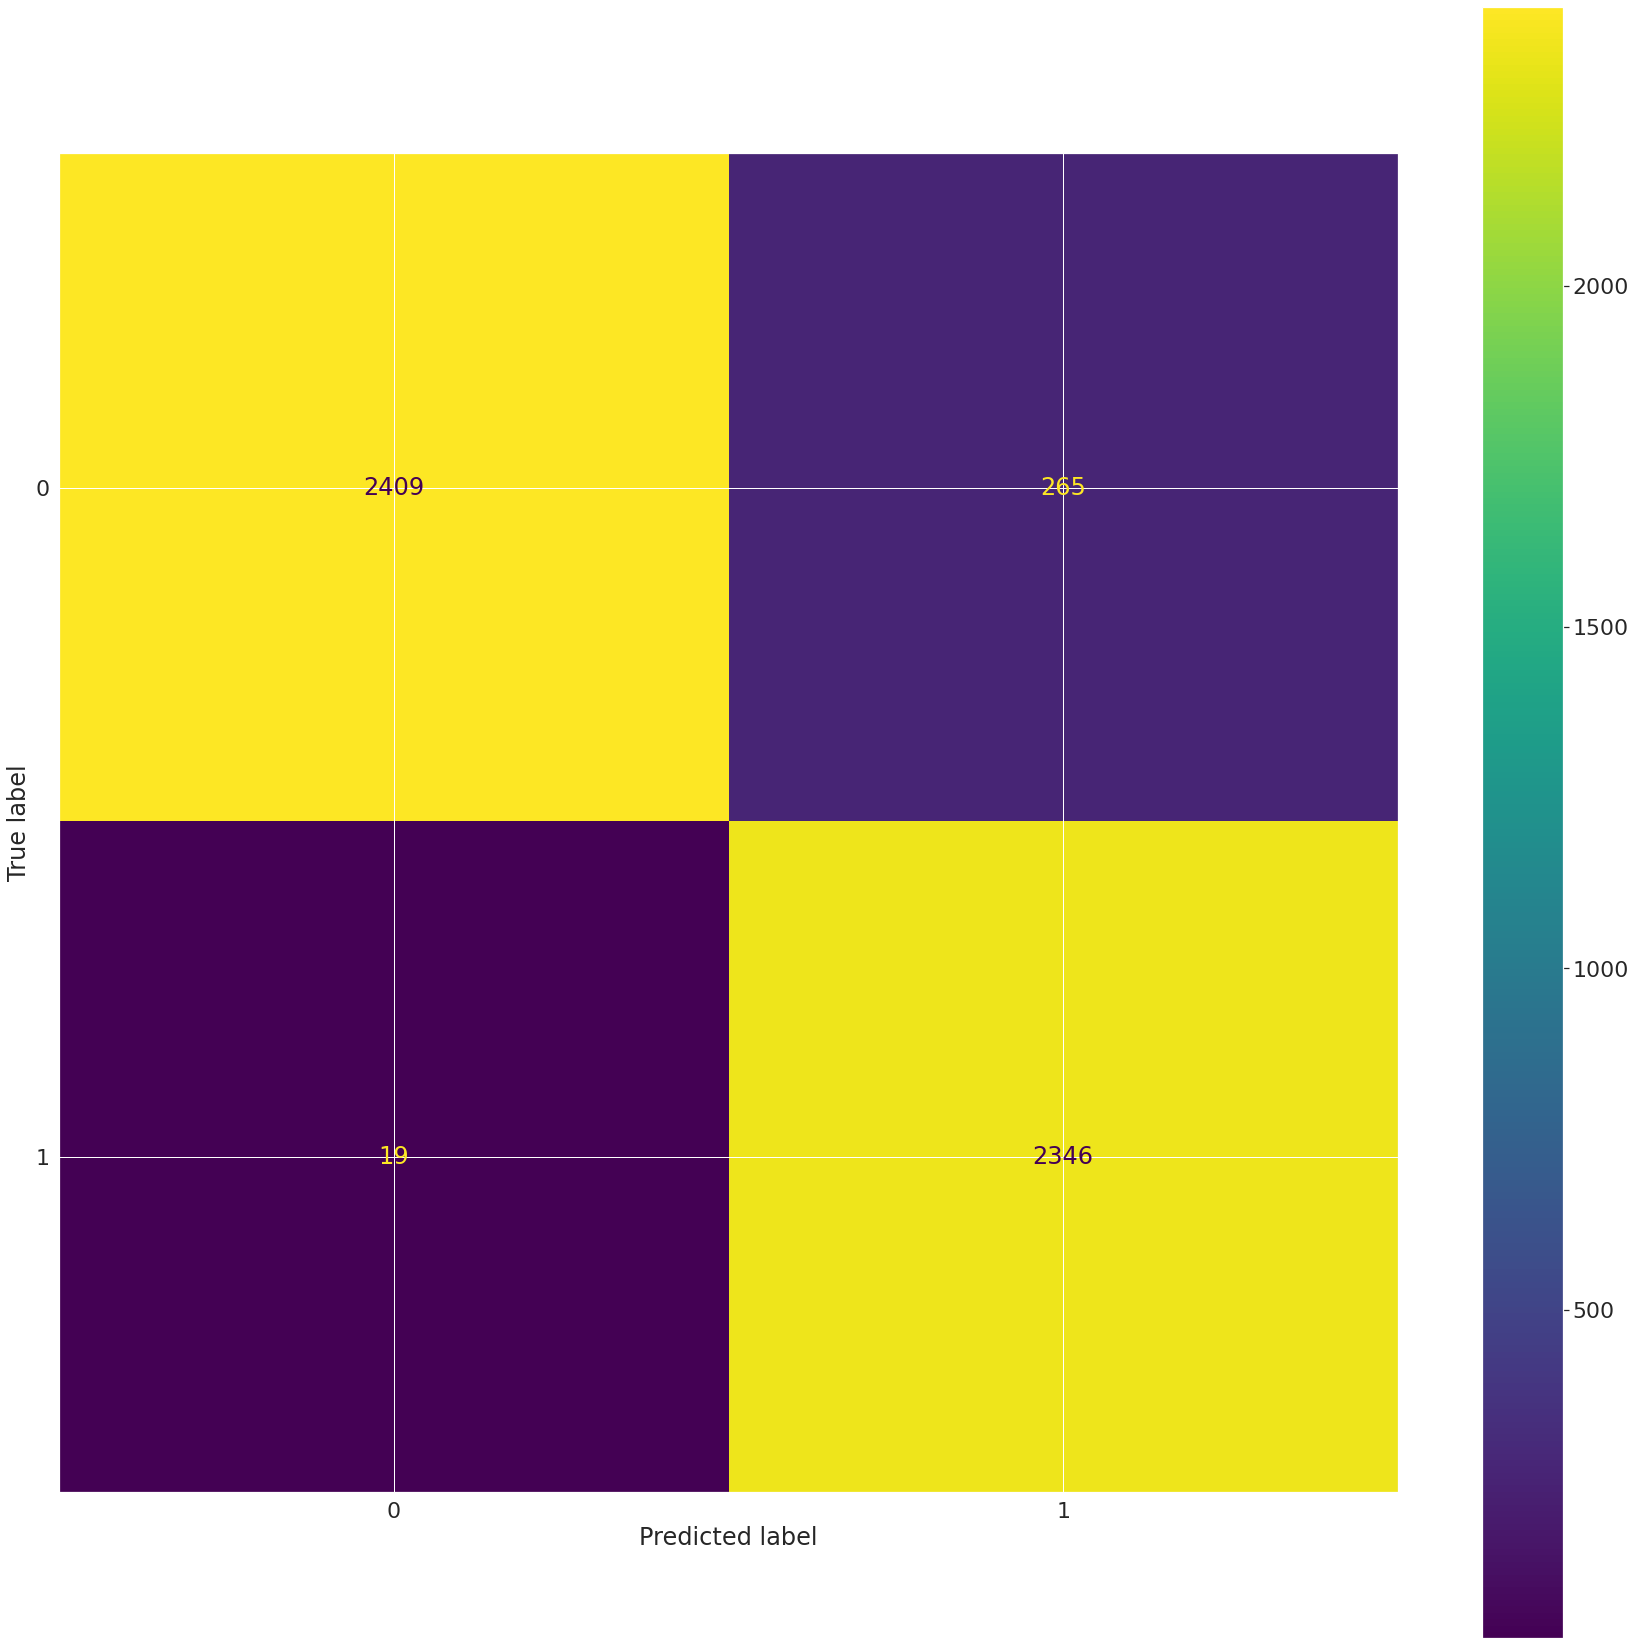


 CatBoostClassifier 



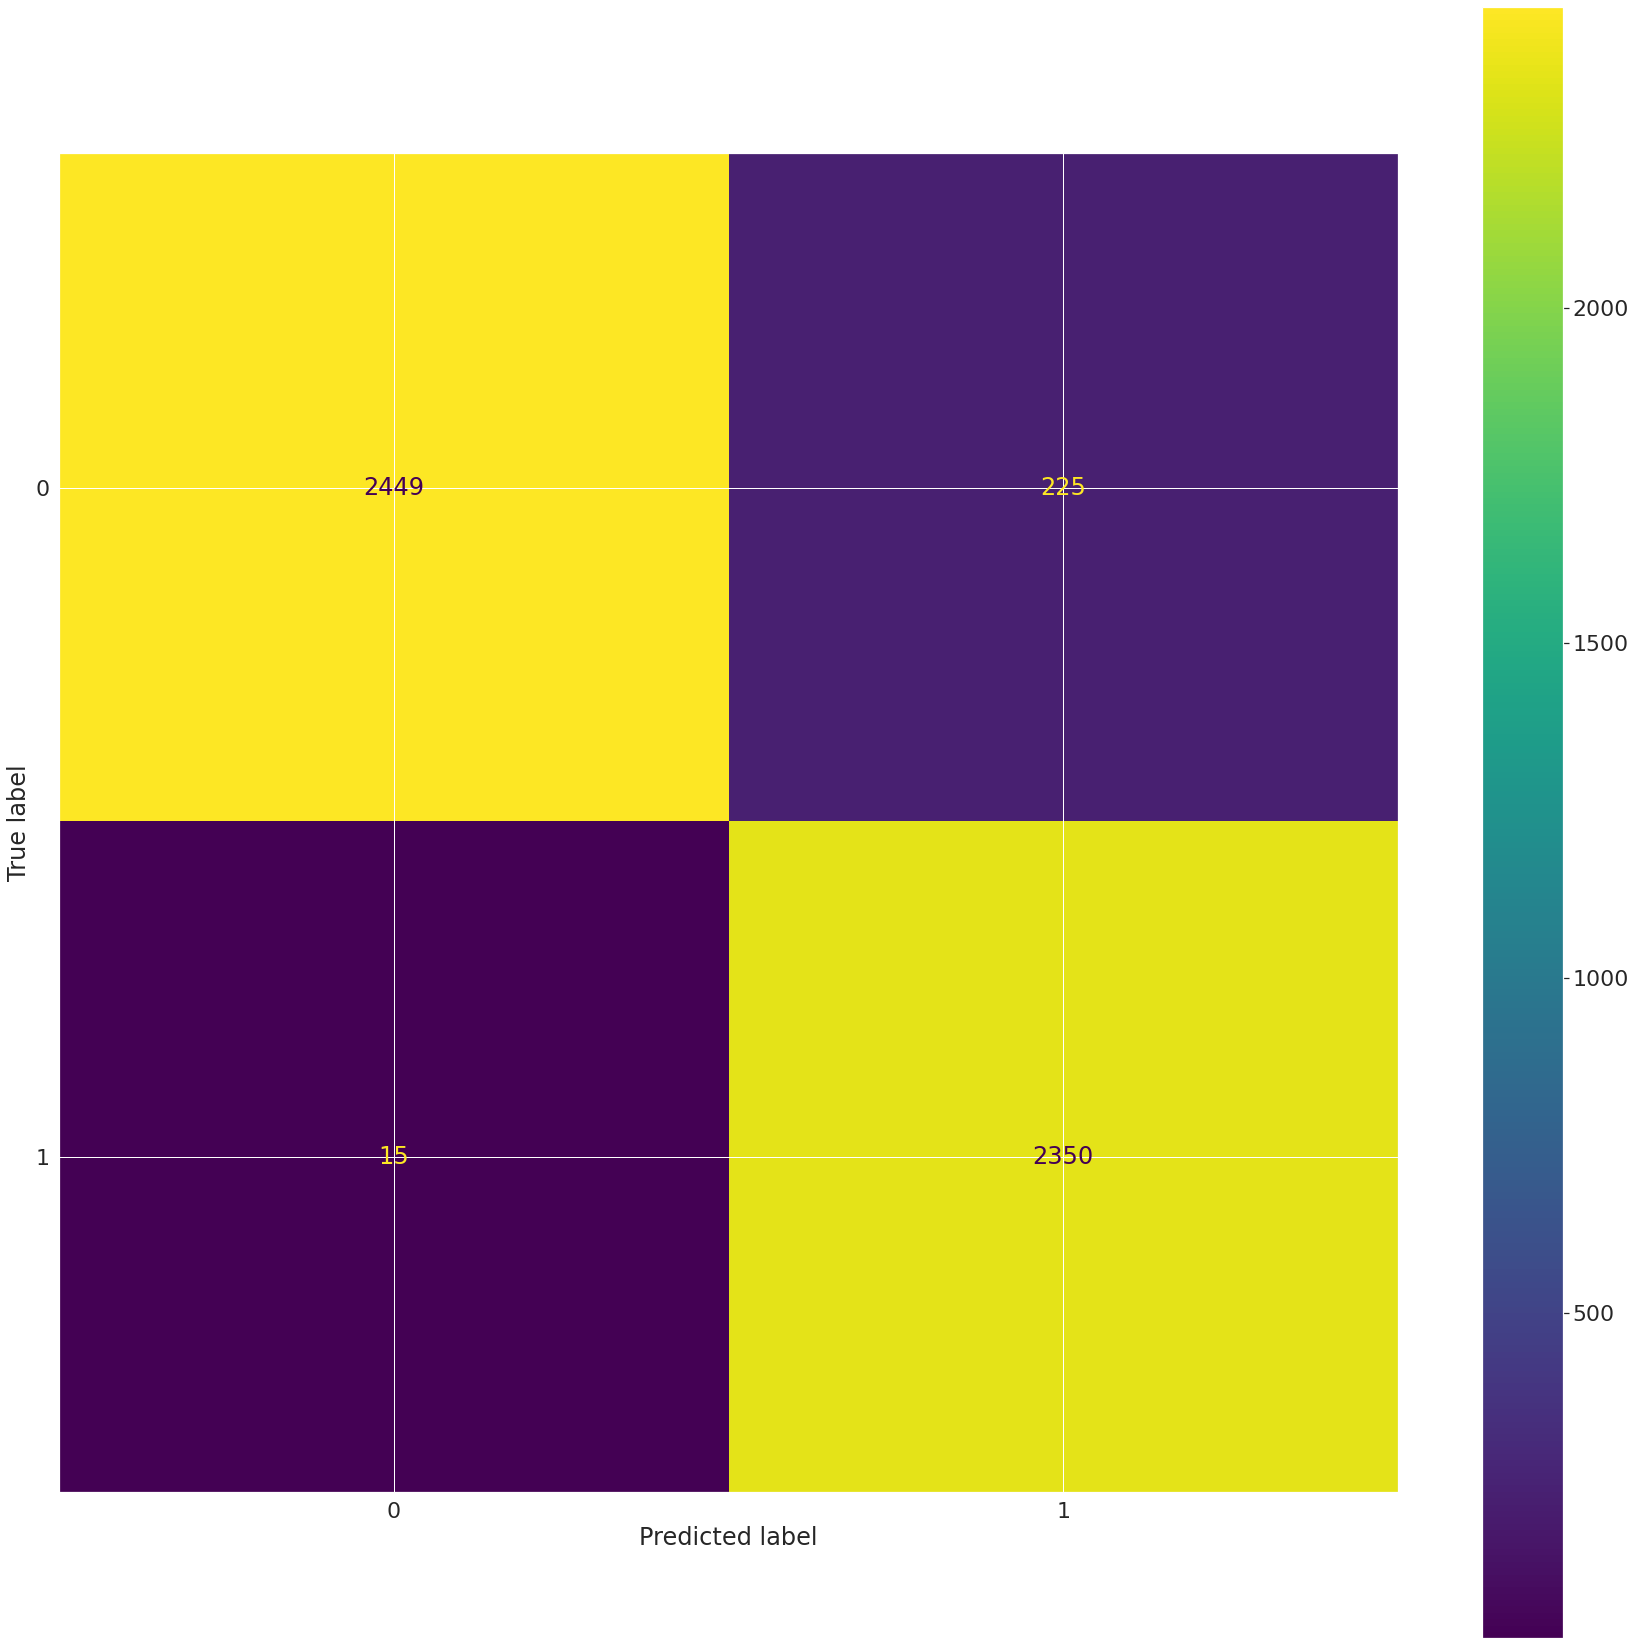


 AdaBoostClassifier 



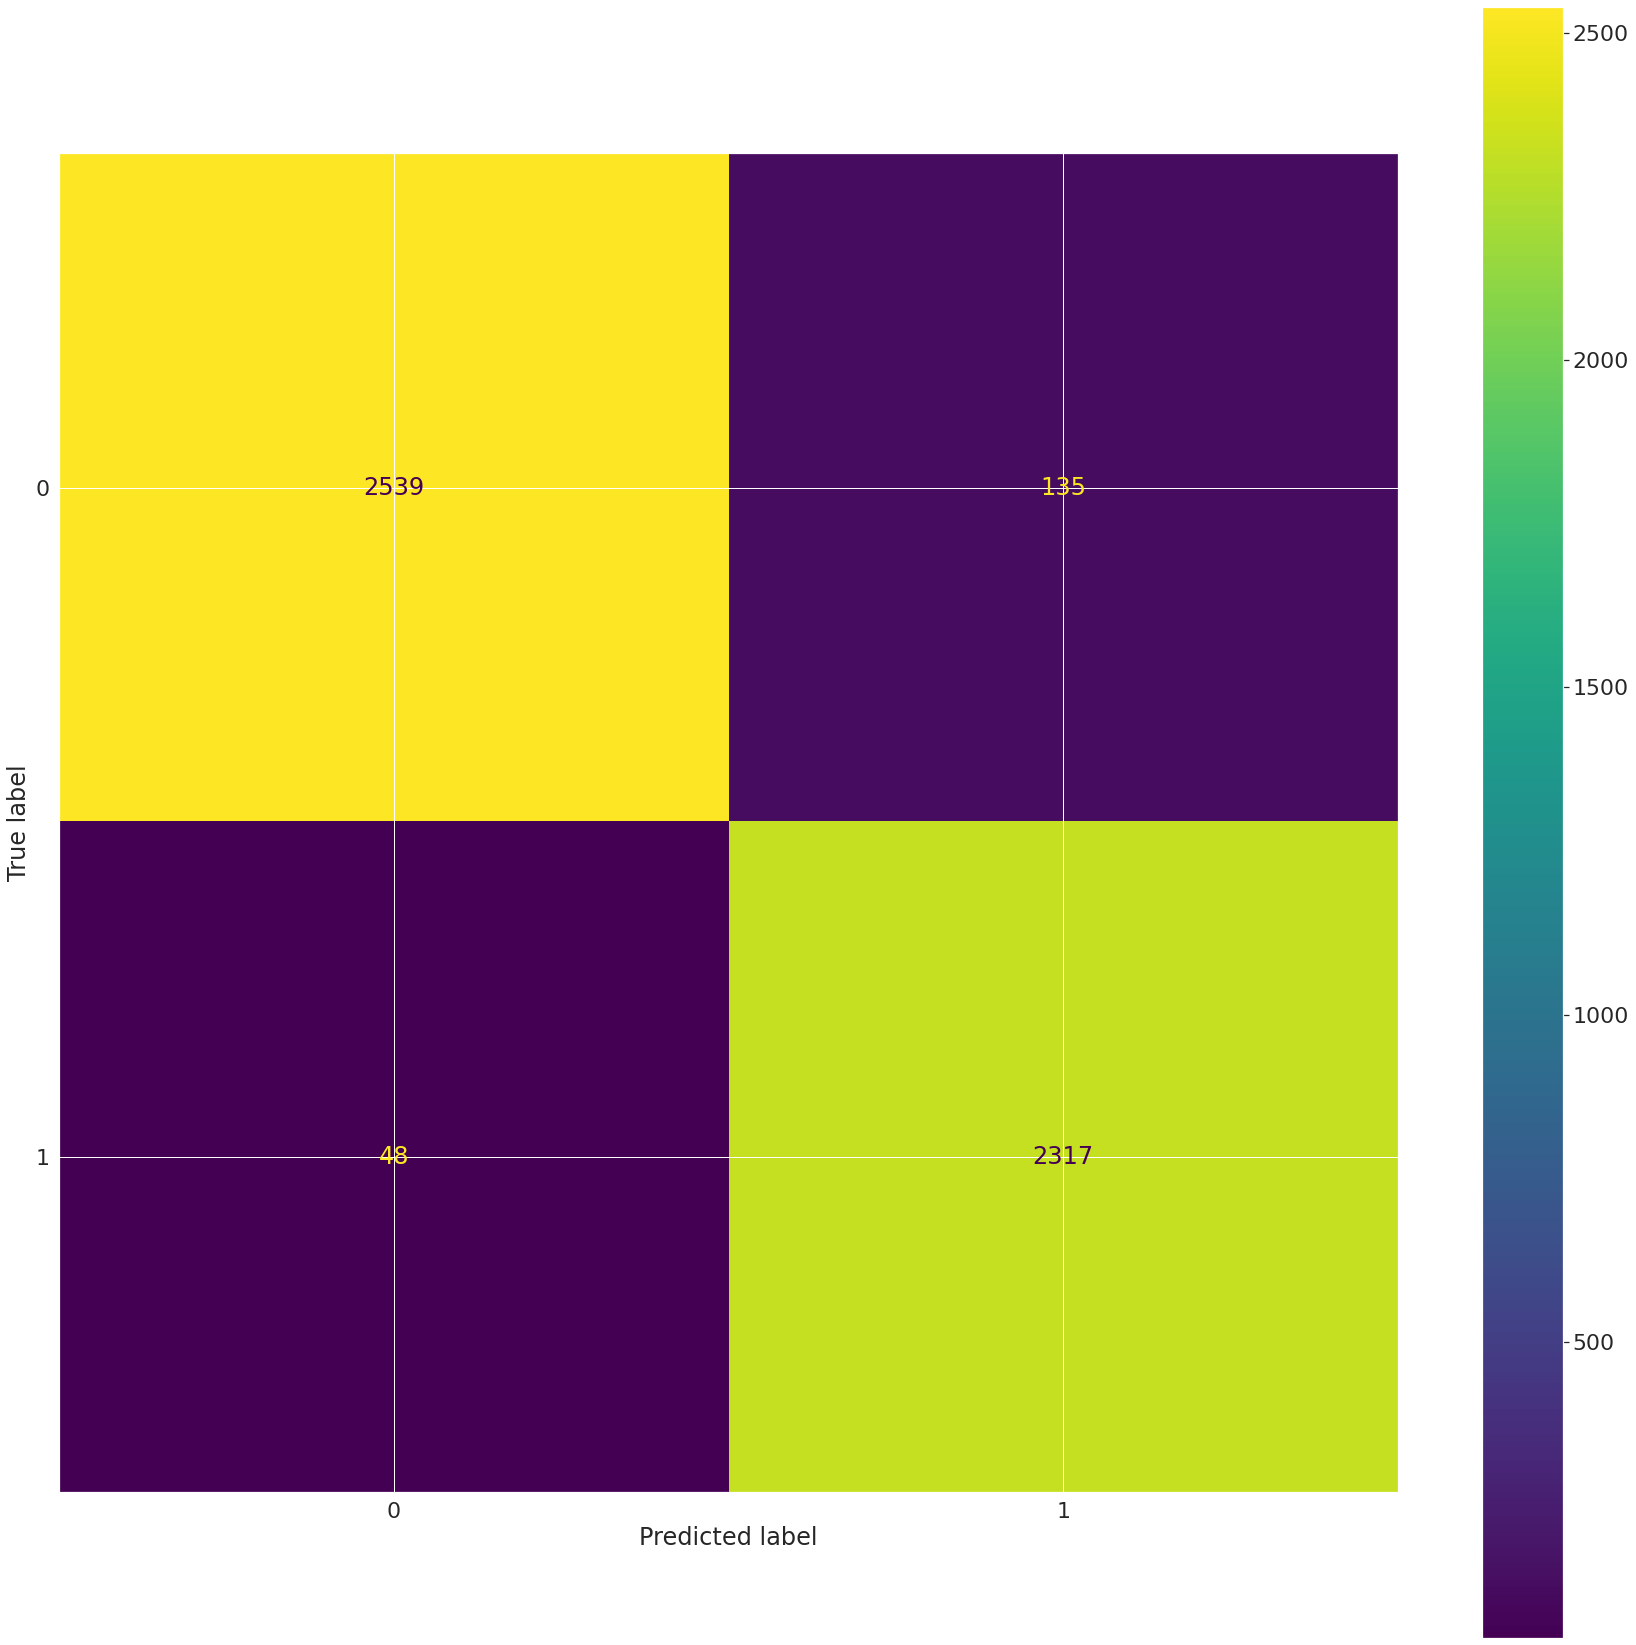


 VotingClassifier 



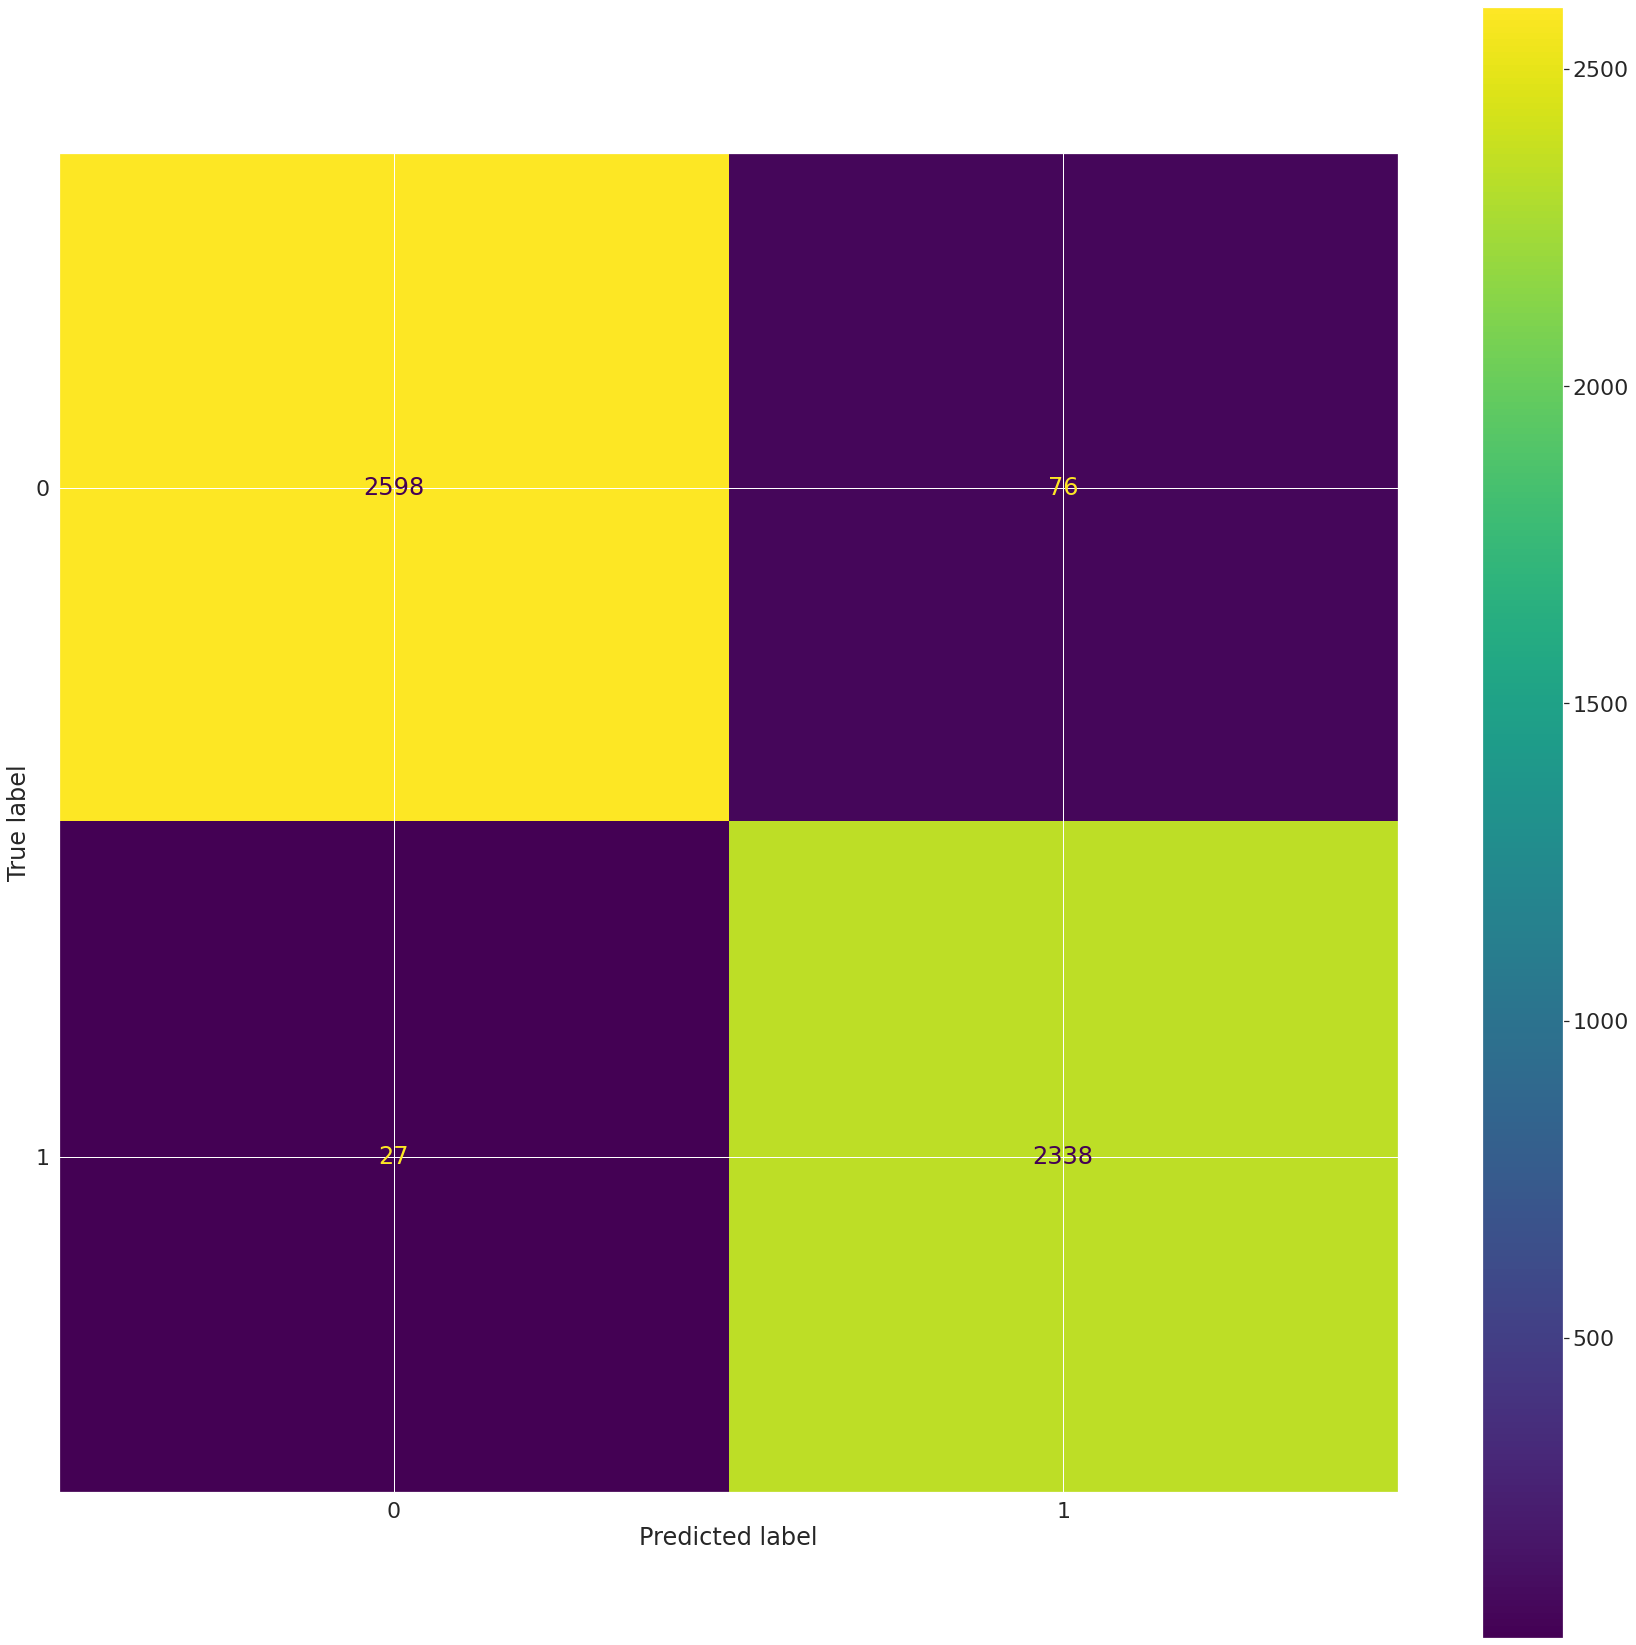

In [29]:

def confusionMatrix(y_test,y_pred):
    cm = confusion_matrix(y_test,y_pred)
    pcm = ConfusionMatrixDisplay(confusion_matrix=cm)
    pcm.plot()
    plt.show()
    
for i in range(len(clf_name)):
  pipeModel = pipe_model(X_train,y_train,X_test,y_test)
  model = pipeModel.load(clf_name[i])
  print("\n",clf_name[i],"\n")
  y_pred = model.predict(X_test)
  confusionMatrix(y_test,y_pred)



# Test_data Prediction

Last step is prediction of data. 
I have taken a slightly different approach in order to better fit my criterias. 

This section will include a function output which takes in x variable as number of iterations for Test_data rows and stores predicted value to the respective key in dictionary defined.

In [23]:
def output(x):
  dictionary = {}
  for i in clf_name:
    dictionary[i] = []
  for z in range(x):
    test_pred = np.array(list(test[z,:])).reshape(1,41)
    for i in  range(len(clf_name)):
      pipeModel = pipe_model(X_train,y_train,X_test,y_test)
      model = pipeModel.load(clf_name[i])
      predict = model.predict(test_pred)
      dictionary[clf_name[i]].append(predict[0])
  test_dataframe = pd.DataFrame(dictionary)
  return test_dataframe , dictionary

test = np.array(test_data)
test_dataframe,dictionary = output(100)
test_dataframe.head()

,RandomForestClassifier,DecisionTreeClassifier,XGBClassifier,CatBoostClassifier,AdaBoostClassifier,VotingClassifier
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,1,0,0,0
4,0,1,1,0,0,0
